##**Problem Statement**
The used car market is vast and diverse, posing a challenge for buyers and sellers to agree on a fair price for a vehicle. Sellers aim to maximize their return, while buyers seek the best possible deal, all of which hinges on numerous factors that can affect a car's market value. Consequently, there is a need for a reliable prediction system that can estimate a used car's price based on its features and market trends.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df = pd.read_csv("/content/Cars24.csv")
df.head()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [ ]:
df.shape

(5918, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Brand      5918 non-null   object
 1   Model          5653 non-null   object
 2   Price          5918 non-null   int64 
 3   Model Year     5918 non-null   int64 
 4   Location       5918 non-null   object
 5   Fuel           5918 non-null   object
 6   Driven (Kms)   5918 non-null   int64 
 7   Gear           5653 non-null   object
 8   Ownership      5918 non-null   int64 
 9   EMI (monthly)  5918 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 462.5+ KB


In [ ]:
df.describe(include='all')

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,5918,5653,5.918000e+03,5918.000000,5918,5918,5918.000000,5653,5918.000000,5918.000000
unique,27,902,NaN,NaN,5,5,NaN,2,NaN,NaN
top,Maruti,Alto 800LXI,NaN,NaN,Delhi,Petrol,NaN,Manual,NaN,NaN
freq,2819,184,NaN,NaN,2312,3787,NaN,5075,NaN,NaN
mean,NaN,NaN,5.180530e+05,2014.547651,NaN,NaN,60842.778979,NaN,1.285738,11523.801284
std,NaN,NaN,3.224695e+05,2.905185,NaN,NaN,42362.990292,NaN,0.532820,7173.156118
min,NaN,NaN,9.100000e+04,2007.000000,NaN,NaN,179.000000,NaN,1.000000,2024.000000
25%,NaN,NaN,3.205240e+05,2012.000000,NaN,NaN,30856.000000,NaN,1.000000,7129.750000
50%,NaN,NaN,4.303990e+05,2015.000000,NaN,NaN,53514.000000,NaN,1.000000,9574.000000
75%,NaN,NaN,6.157990e+05,2017.000000,NaN,NaN,81979.250000,NaN,1.000000,13698.000000


In [ ]:
df.isnull().sum()

Car Brand          0
Model            265
Price              0
Model Year         0
Location           0
Fuel               0
Driven (Kms)       0
Gear             265
Ownership          0
EMI (monthly)      0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]
print(duplicated_rows)

     Car Brand                Model   Price  Model Year Location    Fuel  \
3961    Maruti  ErtigaZDI PLUS SHVS  893999        2017   Mumbai  Diesel   
3962    Maruti  ErtigaZDI PLUS SHVS  893999        2017   Mumbai  Diesel   

      Driven (Kms)    Gear  Ownership  EMI (monthly)  
3961         15427  Manual          1          19887  
3962         15427  Manual          1          19887  


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5917, 10)

In [ ]:
df.duplicated?

##**EDA Steps**

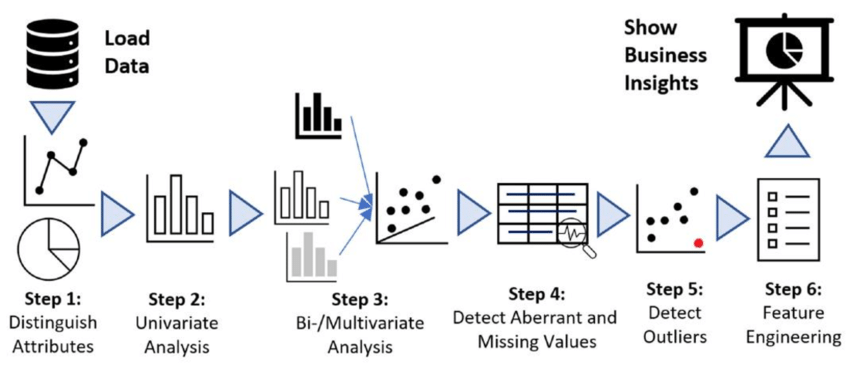

#**Univariate Analysis**

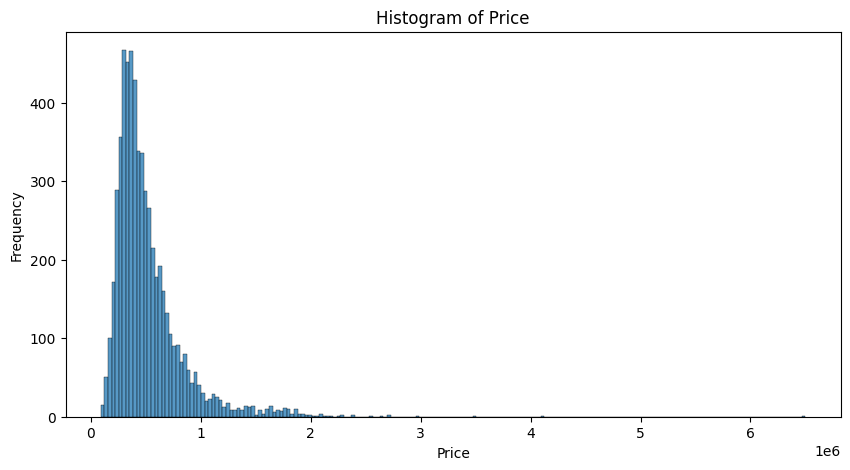

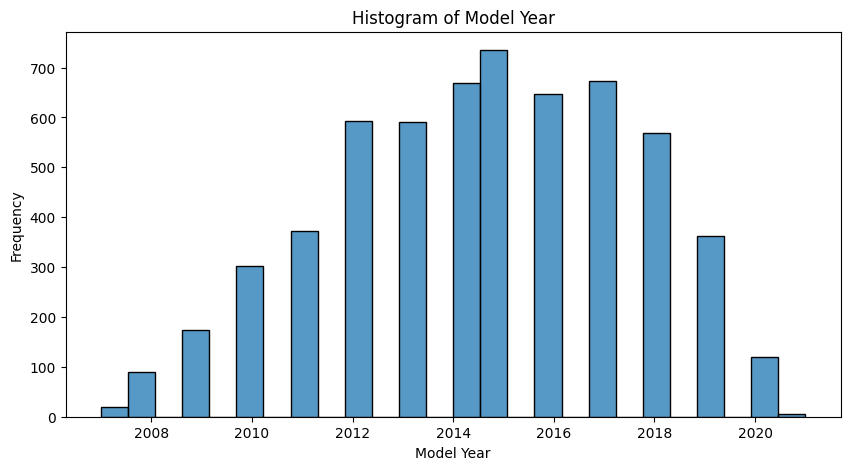

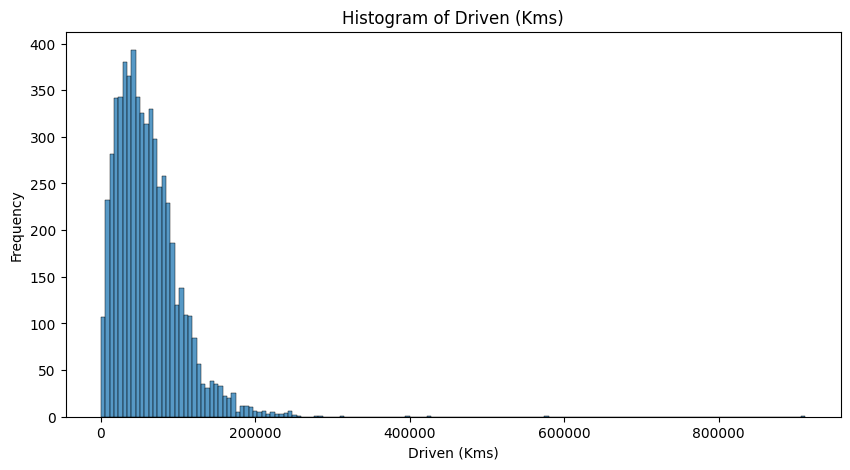

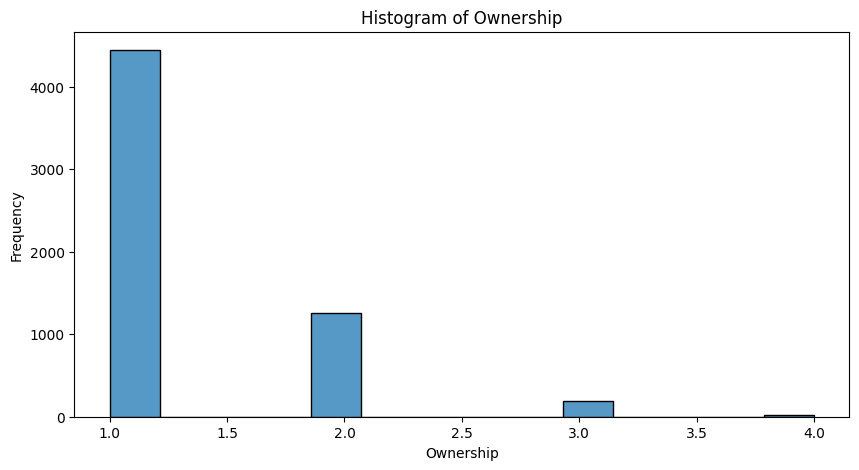

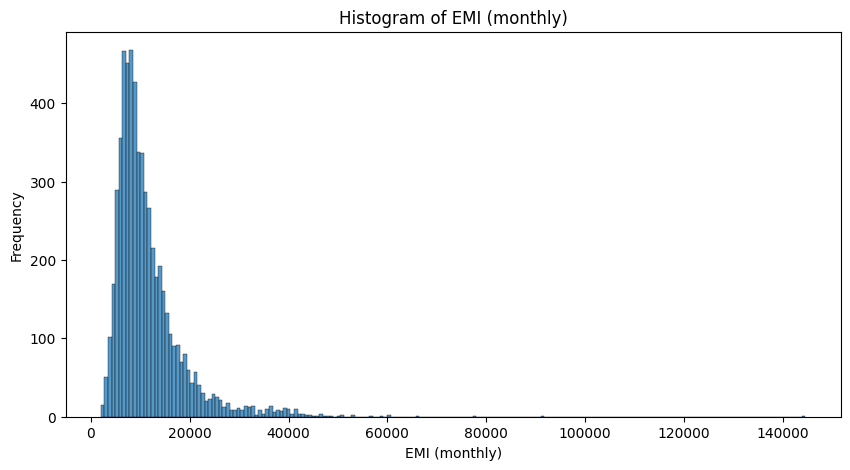

In [ ]:
# Plot histograms for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

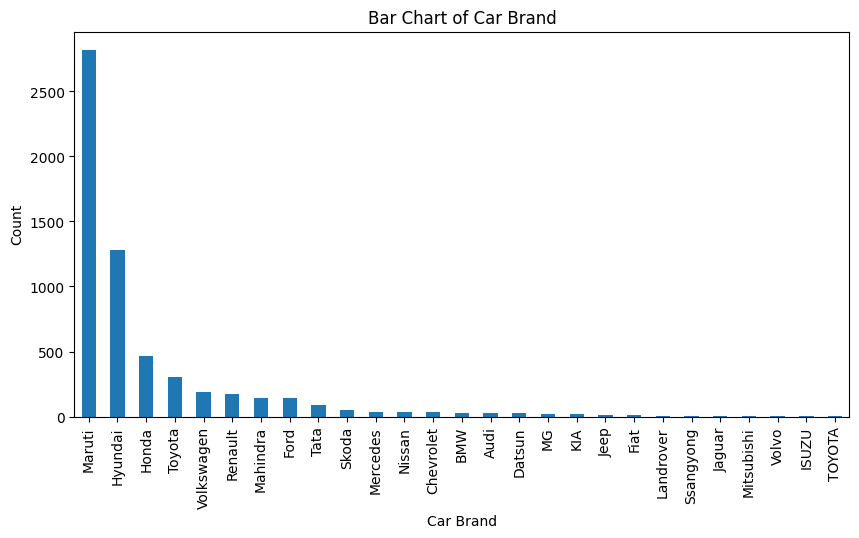

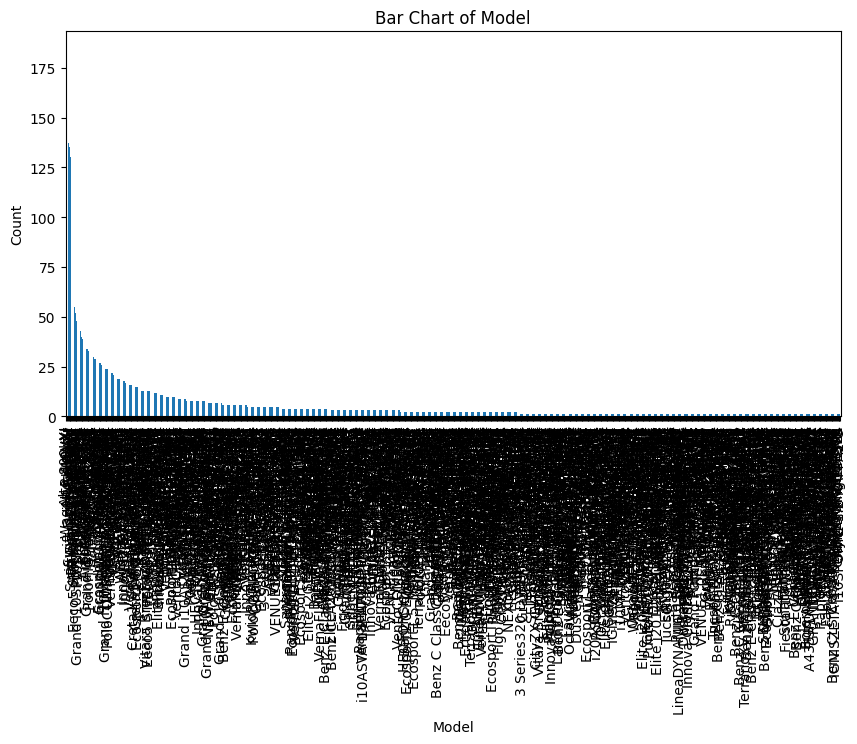

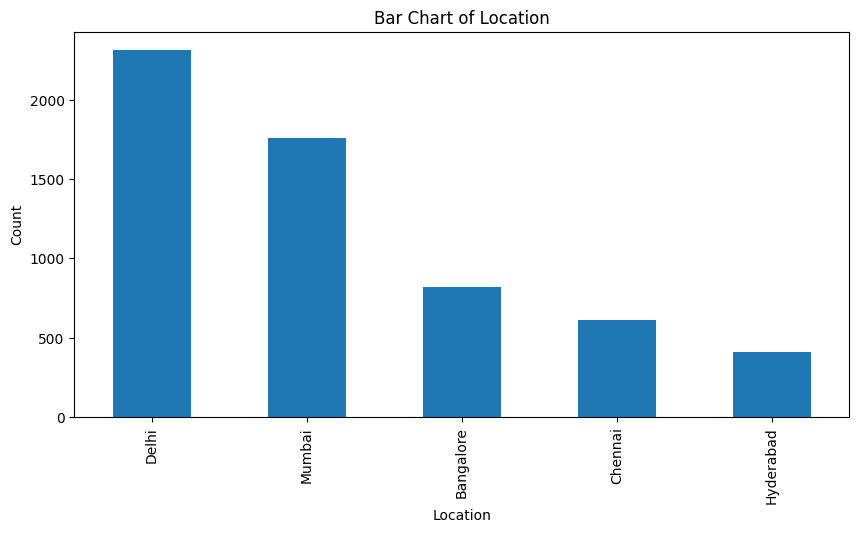

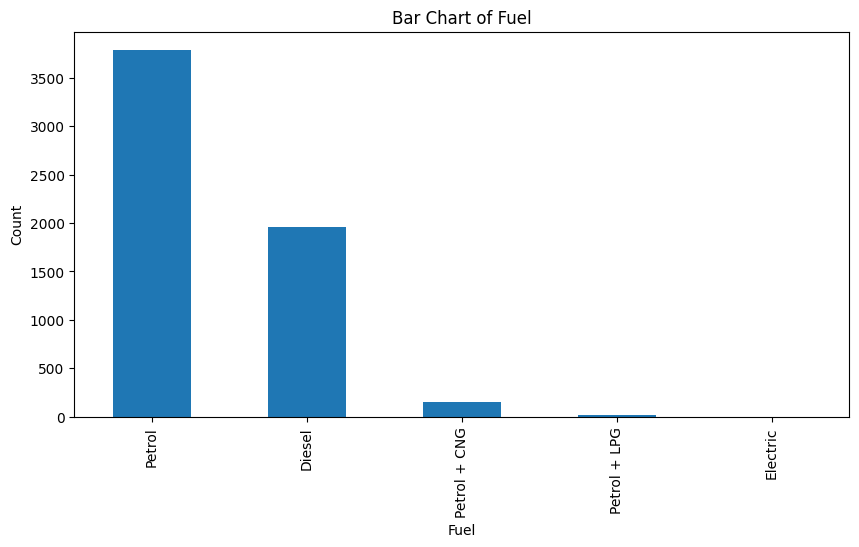

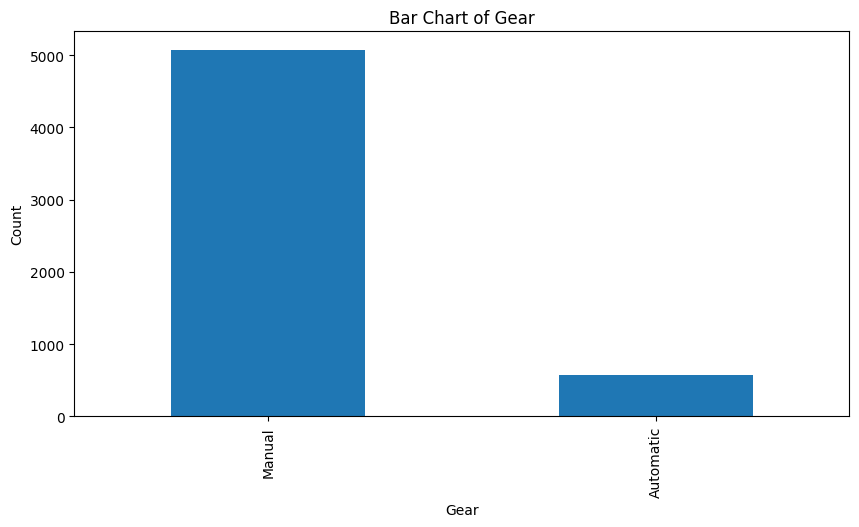

In [ ]:
# Plot bar charts for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

#**Bi-Variate Analysis**

In [ ]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


#**Correlation Analysis**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr()
print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
                   Price  Model Year  Driven (Kms)  Ownership  EMI (monthly)
Price          1.000000    0.474324     -0.091128  -0.090759       1.000000
Model Year     0.474324    1.000000     -0.408526  -0.254125       0.474325
Driven (Kms)  -0.091128   -0.408526      1.000000   0.083715      -0.091128
Ownership     -0.090759   -0.254125      0.083715   1.000000      -0.090759
EMI (monthly)  1.000000    0.474325     -0.091128  -0.090759       1.000000


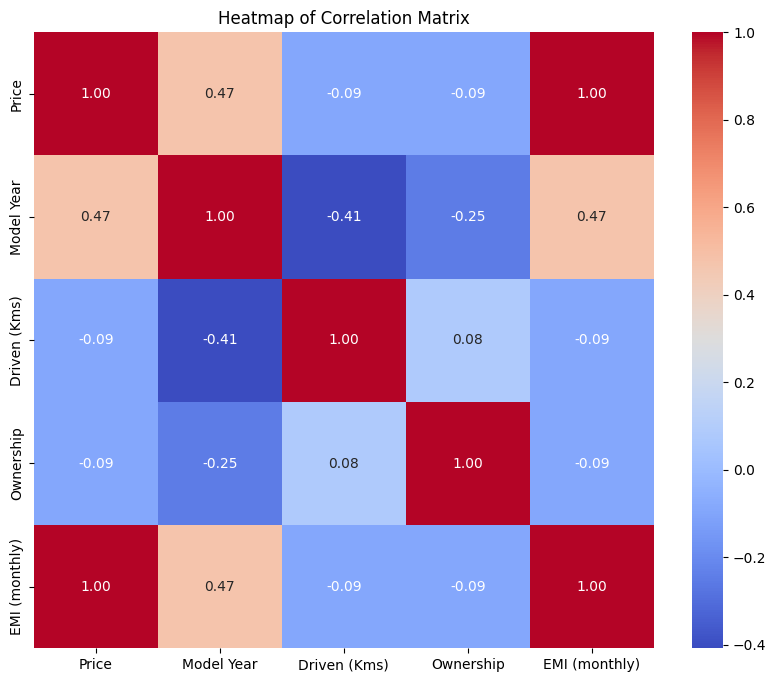

In [ ]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

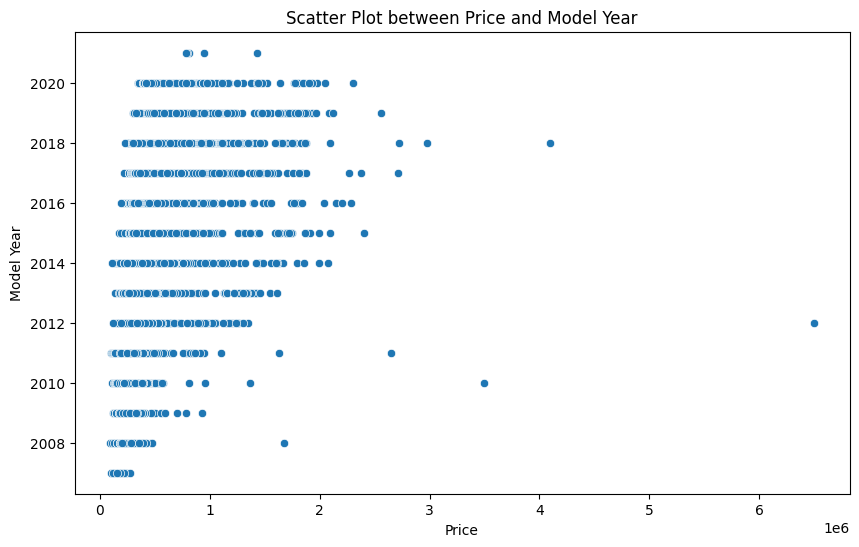

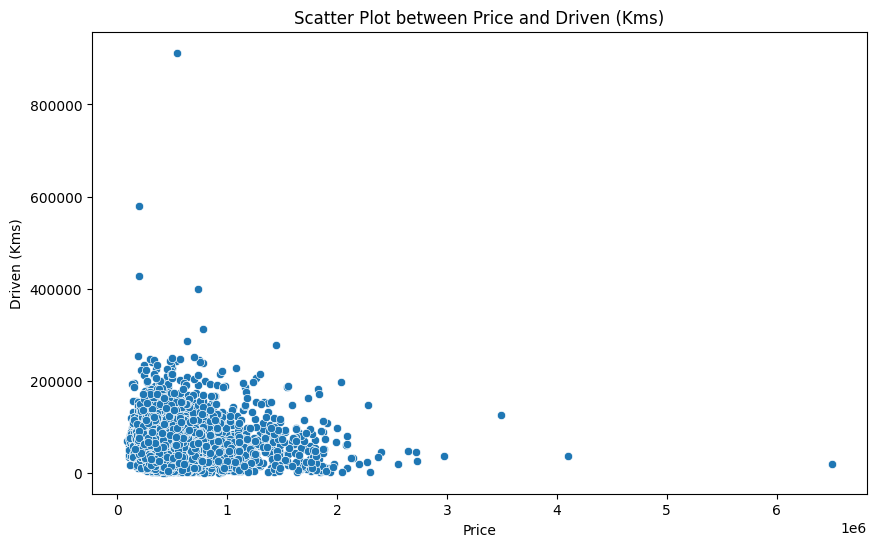

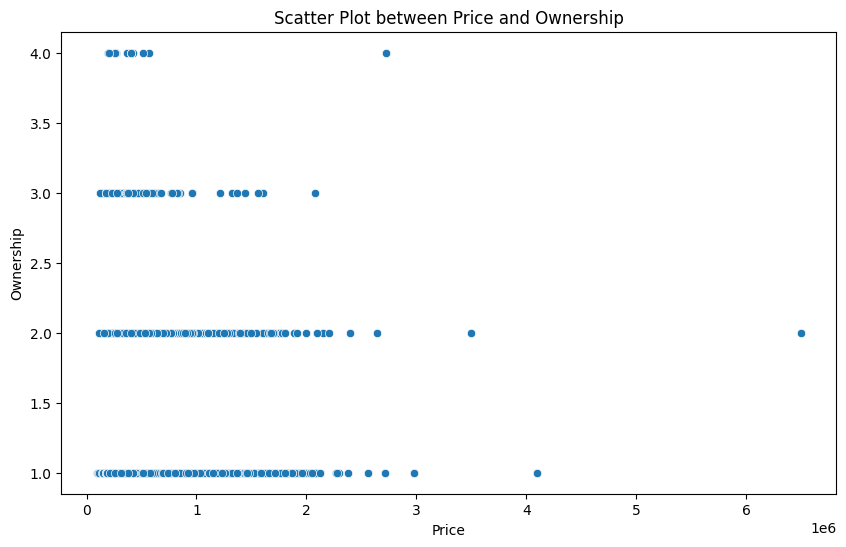

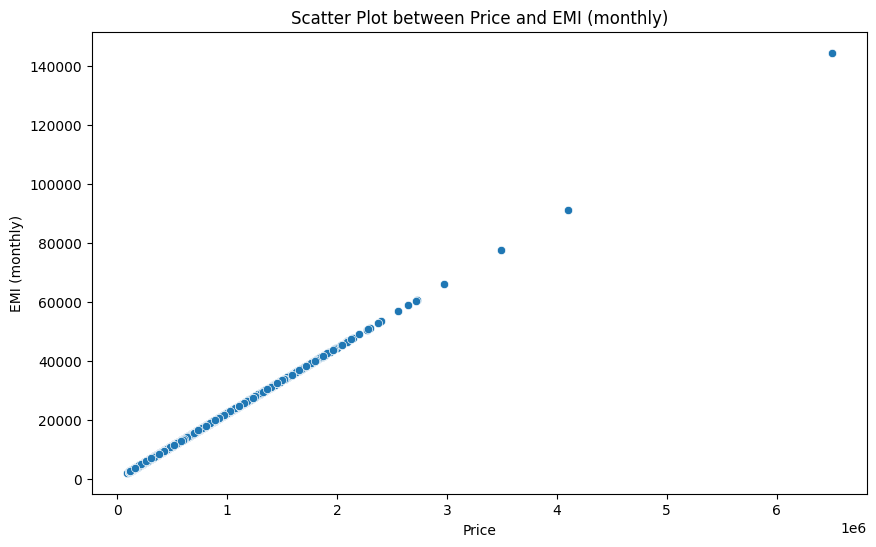

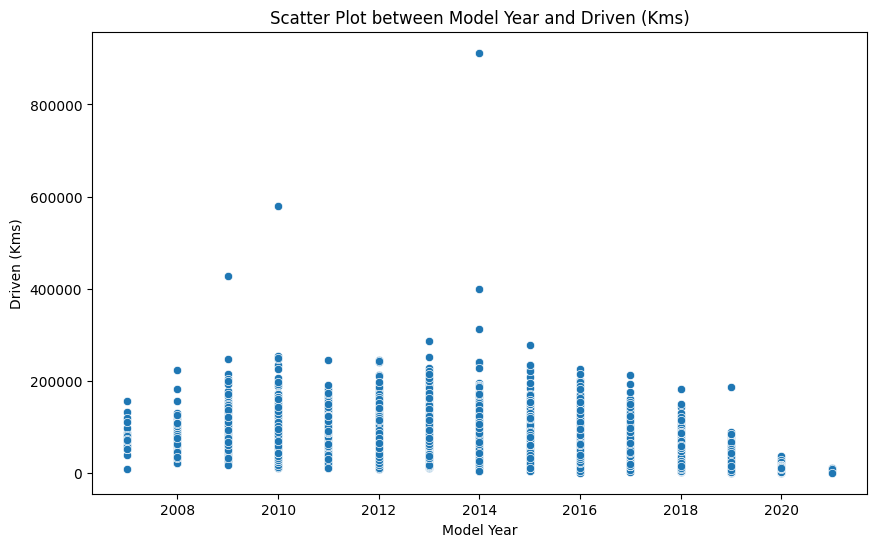

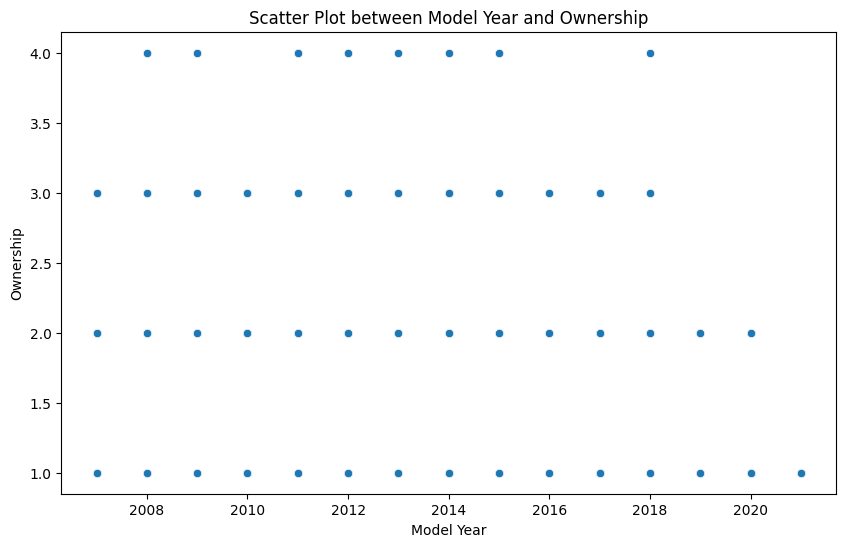

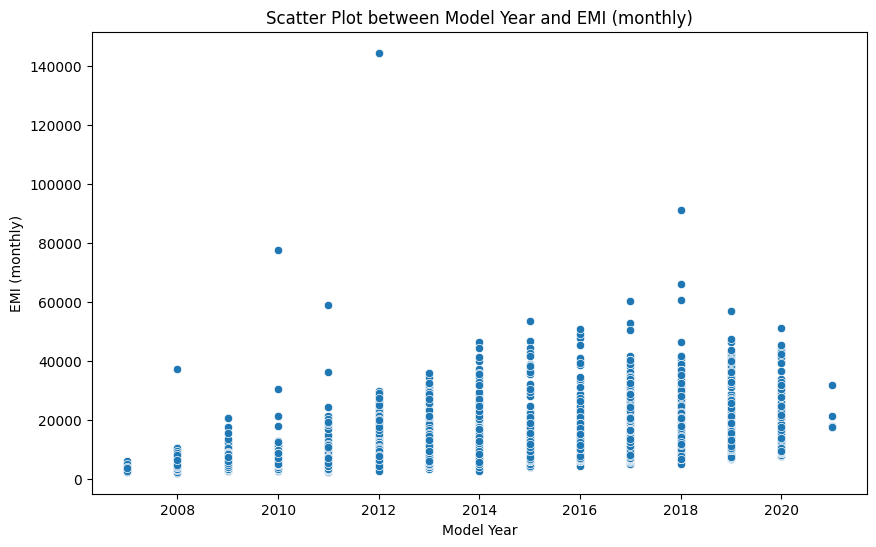

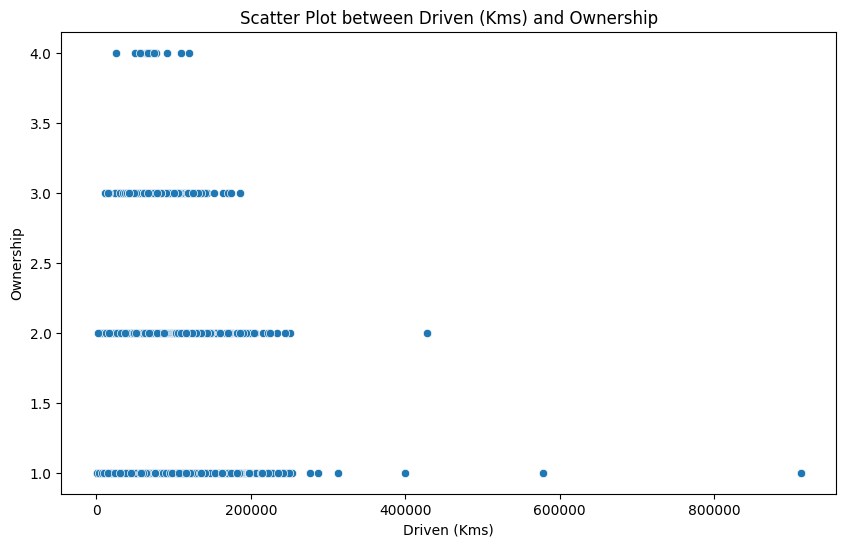

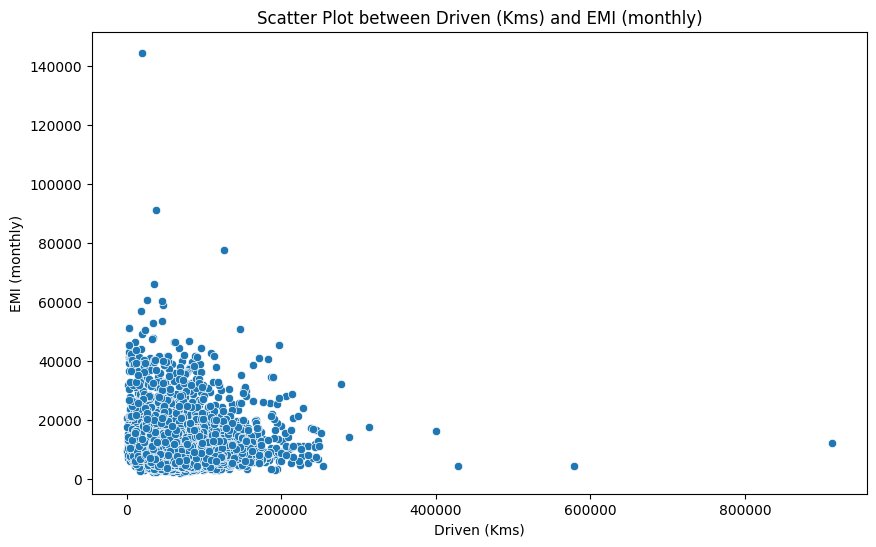

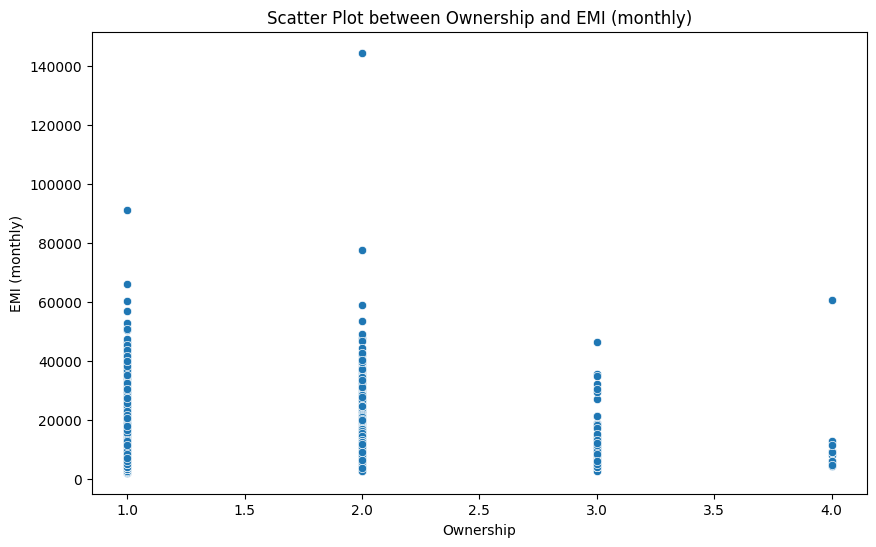

In [ ]:
# Generate scatter plots for pairs of numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j])
        plt.title(f'Scatter Plot between {numerical_columns[i]} and {numerical_columns[j]}')
        plt.show()

#**Do we need to consider EMI for our model prediction?**

#**Handle Missing Values**

In [ ]:
df.isnull().sum()

Car Brand          0
Model            265
Price              0
Model Year         0
Location           0
Fuel               0
Driven (Kms)       0
Gear             265
Ownership          0
EMI (monthly)      0
dtype: int64

In [ ]:
df["Model"].value_counts()

Model
Alto 800LXI               184
Wagon R 1.0VXI            177
Alto K10VXI               156
SwiftVDI                  137
SwiftVXI                  135
                         ... 
TIAGO NRGPETROL             1
Kuv100K8 D 6 STR            1
Santro XingGL CNG           1
CityVX MT O DIESEL          1
i10SPORTZ 1.2 KAPPA2 O      1
Name: count, Length: 902, dtype: int64

In [ ]:
# Filter rows where 'model' column is null
data_null_models = df[df['Model'].isna()]

In [ ]:
data_null_models.head(20)

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
47,Honda,NaN,630399,2019,Hyderabad,Petrol,7093,NaN,1,14023
123,Maruti,NaN,297899,2016,Hyderabad,Petrol,60866,NaN,1,6627
136,Maruti,NaN,337799,2016,Hyderabad,Petrol,47897,NaN,2,7514
166,Volkswagen,NaN,593799,2017,Hyderabad,Petrol,51013,NaN,1,13209
179,Tata,NaN,597899,2019,Hyderabad,Petrol,24296,NaN,1,13300
211,Maruti,NaN,973399,2019,Hyderabad,Petrol,10348,NaN,1,21653
326,Maruti,NaN,283899,2018,Hyderabad,Petrol,45120,NaN,1,6315
341,Maruti,NaN,295099,2018,Hyderabad,Petrol,23497,NaN,1,6564
358,Maruti,NaN,280299,2018,Hyderabad,Petrol,25568,NaN,1,6235
376,Renault,NaN,333099,2016,Hyderabad,Petrol,63653,NaN,1,7410


In [ ]:
df1 = df.groupby(['Car Brand','Model'])['Price'].mean()

In [ ]:
df1.head(500)

Car Brand  Model                        
Audi       A335TDI                          1717799.0
           A42.0 TDI 174BHP                 1128199.0
           A42.0 TDI PREMIUM PLUS           1076549.0
           A42.0 TDI S LINE                 1616899.0
           A435 TDI PREMIUM PLUS SUNROOF    1739799.0
                                              ...    
Maruti     CiazZDI SHVS HYBIRD               643899.0
           CiazZDI+                          569799.0
           CiazZDI+ SHVS                     611499.0
           CiazZDI+ SHVS RS MT               583849.0
           CiazZETA 1.4 VVT                  736866.0
Name: Price, Length: 500, dtype: float64

In [ ]:
df["Gear"].value_counts()

Gear
Manual       5074
Automatic     578
Name: count, dtype: int64

#**Note:** For simplicity, I filled with mode values. But, you can try different approach to fill missing values.

In [ ]:
# Calculate mode for each column
model_mode = df['Model'].mode()[0]  # The mode() function returns a Series, take the first element
gear_mode = df['Gear'].mode()[0]

print(model_mode)
print(gear_mode)
# # Fill missing values with the mode
df['Model'] = df['Model'].fillna(model_mode)
df['Gear'] = df['Gear'].fillna(gear_mode)

Alto 800LXI
Manual


In [ ]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [ ]:
df.isnull().sum()

Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

#**Outlier Detection & Handle It**

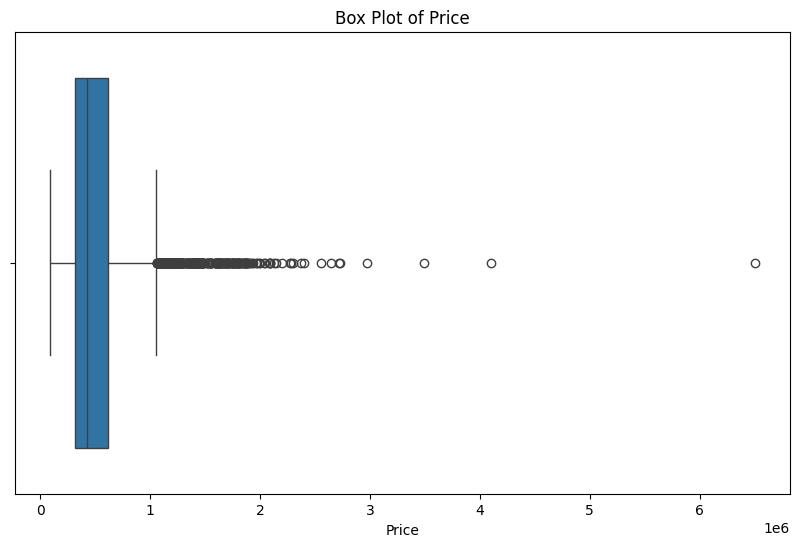

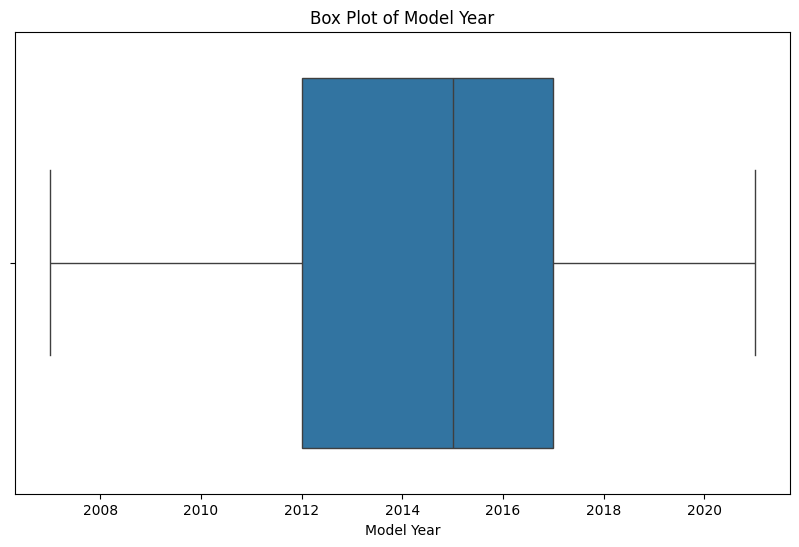

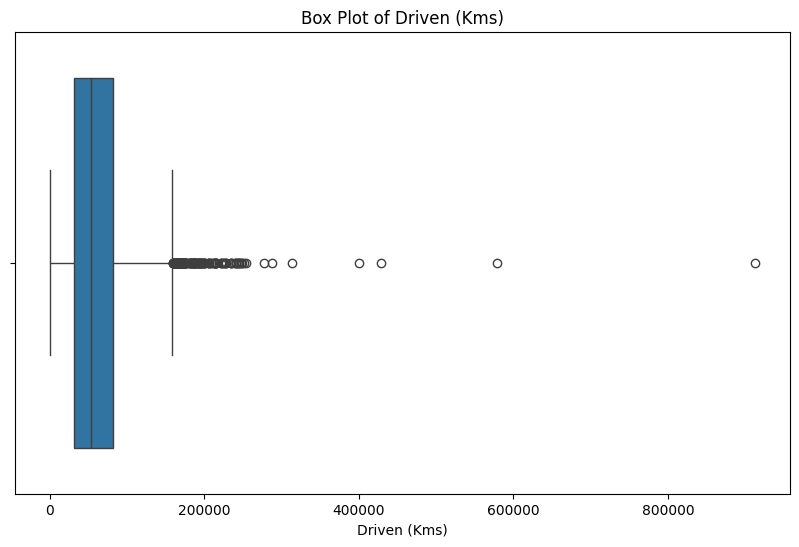

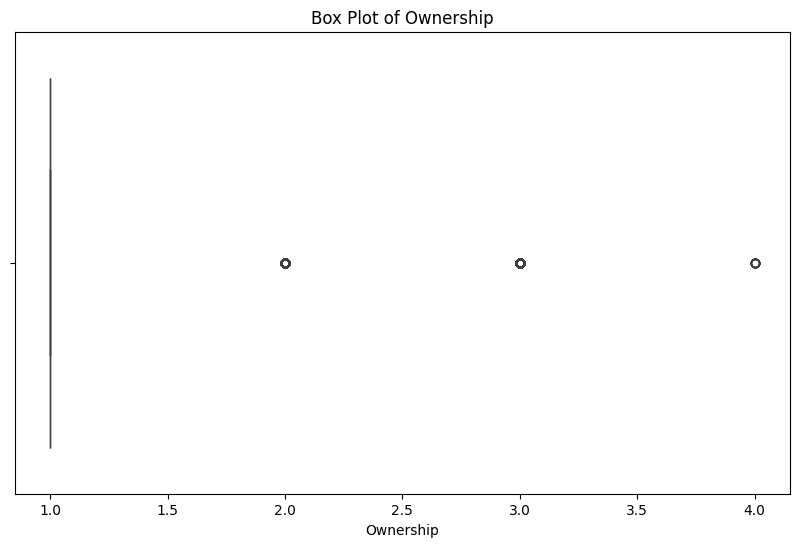

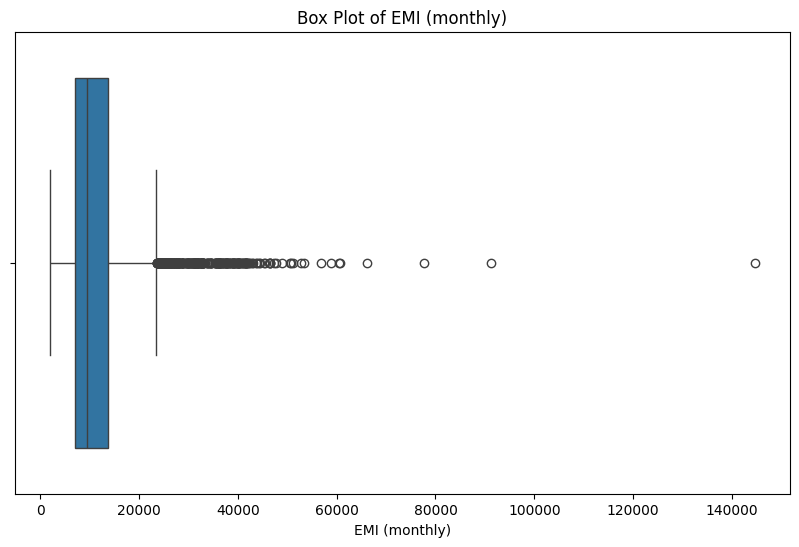

In [ ]:
# Identify numerical columns by data type
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a box plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set the figure size for better readability
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
df.describe()

,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
count,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000
mean,5.179894e+05,2014.547237,60850.454453,1.285787,11522.387865
std,3.224597e+05,2.905255,42362.454978,0.532852,7172.938132
min,9.100000e+04,2007.000000,179.000000,1.000000,2024.000000
25%,3.204990e+05,2012.000000,30868.000000,1.000000,7129.000000
50%,4.303990e+05,2015.000000,53522.000000,1.000000,9574.000000
75%,6.157990e+05,2017.000000,81993.000000,1.000000,13698.000000
max,6.500000e+06,2021.000000,912380.000000,4.000000,144589.000000


In [ ]:
#Simple Example to understand IQR technique
import numpy as np

# Sample data
prices = [2000, 2500, 2800, 3000, 3200, 3500, 3700, 4000, 4200, 4500, 4800, 5000, 5200, 5500, 6000, 6500, 7000, 8000, 8500, 9000, 10000, 12000, 15000]

# Calculate Q1, Q3, and IQR
q1 = np.percentile(prices, 25)
q3 = np.percentile(prices, 75)
iqr = q3 - q1

# Calculate outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Lower Bound (Outlier):", lower_bound)
print("Upper Bound (Outlier):", upper_bound)

# Identify outliers
outliers = [price for price in prices if price < lower_bound or price > upper_bound]
print("Outliers:", outliers)


Q1: 3600.0
Q3: 7500.0
IQR: 3900.0
Lower Bound (Outlier): -2250.0
Upper Bound (Outlier): 13350.0
Outliers: [15000]


#**Feature Engineering**

1.Binning: Convert numerical values into categorical bins. For example, you might create age groups for cars or group mileages into low, medium, and high usage.

2.Group Statistics: Create features like the average price of cars by brand or model. This can help the model understand relative costs within categories.

In [ ]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


#**Encoding**

In [ ]:
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [ ]:
df["Location"].value_counts()

Location
Delhi        2312
Mumbai       1759
Bangalore     822
Chennai       614
Hyderabad     410
Name: count, dtype: int64

In [ ]:
df["Fuel"].value_counts()

Fuel
Petrol          3787
Diesel          1963
Petrol + CNG     147
Petrol + LPG      18
Electric           2
Name: count, dtype: int64

In [ ]:
df["Gear"].value_counts()

Gear
Manual       5339
Automatic     578
Name: count, dtype: int64

In [ ]:
df["Model"].value_counts()

Model
Alto 800LXI               449
Wagon R 1.0VXI            177
Alto K10VXI               156
SwiftVDI                  137
SwiftVXI                  135
                         ... 
TIAGO NRGPETROL             1
Kuv100K8 D 6 STR            1
Santro XingGL CNG           1
CityVX MT O DIESEL          1
i10SPORTZ 1.2 KAPPA2 O      1
Name: count, Length: 902, dtype: int64

In [ ]:
df["Car Brand"].value_counts()

Car Brand
Maruti        2818
Hyundai       1281
Honda          465
Toyota         301
Volkswagen     192
Renault        174
Mahindra       143
Ford           142
Tata            91
Skoda           51
Mercedes        34
Nissan          33
Chevrolet       32
BMW             26
Audi            25
Datsun          24
MG              21
KIA             21
Jeep            15
Fiat            12
Landrover        5
Ssangyong        3
Jaguar           3
Mitsubishi       2
Volvo            1
ISUZU            1
TOYOTA           1
Name: count, dtype: int64

In [ ]:
encoded_df = pd.get_dummies(df, columns=['Location'],dtype=int)

In [ ]:
encoded_df.head()

,Car Brand,Model,Price,Model Year,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly),Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai
0,Hyundai,EonERA PLUS,330399,2016,Petrol,10674,Manual,2,7350,0,0,0,1,0
1,Maruti,Wagon R 1.0LXI,350199,2011,Petrol,20979,Manual,1,7790,0,0,0,1,0
2,Maruti,Alto K10LXI,229199,2011,Petrol,47330,Manual,2,5098,0,0,0,1,0
3,Maruti,RitzVXI BS IV,306399,2011,Petrol,19662,Manual,1,6816,0,0,0,1,0
4,Tata,NanoTWIST XTA,208699,2015,Petrol,11256,Automatic,1,4642,0,0,0,1,0


In [ ]:
encoded_df = pd.get_dummies(encoded_df, columns=['Fuel'],dtype=int)
encoded_df = pd.get_dummies(encoded_df, columns=['Gear'],dtype=int)

In [ ]:
encoded_df.head(20)

,Car Brand,Model,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,Hyundai,EonERA PLUS,330399,2016,10674,2,7350,0,0,0,1,0,0,0,1,0,0,0,1
1,Maruti,Wagon R 1.0LXI,350199,2011,20979,1,7790,0,0,0,1,0,0,0,1,0,0,0,1
2,Maruti,Alto K10LXI,229199,2011,47330,2,5098,0,0,0,1,0,0,0,1,0,0,0,1
3,Maruti,RitzVXI BS IV,306399,2011,19662,1,6816,0,0,0,1,0,0,0,1,0,0,0,1
4,Tata,NanoTWIST XTA,208699,2015,11256,1,4642,0,0,0,1,0,0,0,1,0,0,1,0
5,Maruti,AltoLXI,249699,2012,28434,1,5554,0,0,0,1,0,0,0,1,0,0,0,1
6,Maruti,AltoLXI,240599,2011,31119,1,5352,0,0,0,1,0,0,0,1,0,0,0,1
7,Maruti,Alto K10LXI,191999,2010,10910,1,4271,0,0,0,1,0,0,0,1,0,0,0,1
8,Honda,Brio1.2 S MT I VTEC,362299,2013,40362,2,8059,0,0,0,1,0,0,0,1,0,0,0,1
9,Maruti,Wagon R 1.0VXI,385799,2014,15673,2,8582,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
encoded_df["Car Brand"]=encoded_df.groupby("Car Brand")["Price"].transform("mean")
encoded_df["Model"]=encoded_df.groupby("Model")["Price"].transform("mean")

In [ ]:
encoded_df.head(20)

,Car Brand,Model,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,492485.183450,284571.488372,330399,2016,10674,2,7350,0,0,0,1,0,0,0,1,0,0,0,1
1,442471.519872,278645.968750,350199,2011,20979,1,7790,0,0,0,1,0,0,0,1,0,0,0,1
2,442471.519872,244176.318182,229199,2011,47330,2,5098,0,0,0,1,0,0,0,1,0,0,0,1
3,442471.519872,338829.846154,306399,2011,19662,1,6816,0,0,0,1,0,0,0,1,0,0,0,1
4,660660.494505,230532.333333,208699,2015,11256,1,4642,0,0,0,1,0,0,0,1,0,0,1,0
5,442471.519872,225136.917355,249699,2012,28434,1,5554,0,0,0,1,0,0,0,1,0,0,0,1
6,442471.519872,225136.917355,240599,2011,31119,1,5352,0,0,0,1,0,0,0,1,0,0,0,1
7,442471.519872,244176.318182,191999,2010,10910,1,4271,0,0,0,1,0,0,0,1,0,0,0,1
8,514714.374194,335212.916667,362299,2013,40362,2,8059,0,0,0,1,0,0,0,1,0,0,0,1
9,442471.519872,354233.954802,385799,2014,15673,2,8582,0,0,0,1,0,0,0,1,0,0,0,1


#**Feature Scaling**

In [ ]:
encoded_df.columns

Index(['Car Brand', 'Model', 'Price', 'Model Year', 'Driven (Kms)',
       'Ownership', 'EMI (monthly)', 'Location_Bangalore', 'Location_Chennai',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Mumbai',
       'Fuel_Diesel', 'Fuel_Electric', 'Fuel_Petrol', 'Fuel_Petrol + CNG',
       'Fuel_Petrol + LPG', 'Gear_Automatic', 'Gear_Manual'],
      dtype='object')

In [ ]:
# X = encoded_df.drop(columns = ["Price"])
X = encoded_df.drop(columns = ["Price","EMI (monthly)"])
y = encoded_df["Price"]

In [ ]:
X.columns

Index(['Car Brand', 'Model', 'Model Year', 'Driven (Kms)', 'Ownership',
       'Location_Bangalore', 'Location_Chennai', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Mumbai', 'Fuel_Diesel', 'Fuel_Electric',
       'Fuel_Petrol', 'Fuel_Petrol + CNG', 'Fuel_Petrol + LPG',
       'Gear_Automatic', 'Gear_Manual'],
      dtype='object')

In [ ]:
X.head()

,Car Brand,Model,Model Year,Driven (Kms),Ownership,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,492485.183450,284571.488372,2016,10674,2,0,0,0,1,0,0,0,1,0,0,0,1
1,442471.519872,278645.968750,2011,20979,1,0,0,0,1,0,0,0,1,0,0,0,1
2,442471.519872,244176.318182,2011,47330,2,0,0,0,1,0,0,0,1,0,0,0,1
3,442471.519872,338829.846154,2011,19662,1,0,0,0,1,0,0,0,1,0,0,0,1
4,660660.494505,230532.333333,2015,11256,1,0,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
X_train.shape

(4141, 17)

In [ ]:
y_train.shape

(4141,)

In [ ]:
scaler = MinMaxScaler()
# scaler.fit(X)
# scaler.transform(X)
X_train=pd.DataFrame(scaler.fit_transform(X_train[list(X.columns)]),
                                    columns=X.columns)
X_test=pd.DataFrame(scaler.transform(X_test[list(X.columns)]),
                                    columns=X.columns)

In [ ]:
X_train.head()

,Car Brand,Model,Model Year,Driven (Kms),Ownership,Location_Bangalore,Location_Chennai,Location_Delhi,Location_Hyderabad,Location_Mumbai,Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,0.044840,0.163949,0.785714,0.018350,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.044840,0.083520,0.285714,0.127402,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.044840,0.073215,0.214286,0.081392,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.036889,0.039357,0.142857,0.069956,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.036889,0.065557,0.285714,0.022117,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#**Model Implementation**

In [ ]:
# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([970752., 802816., 552960., 540672., 520192.])

#**Model Evaluation**

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mean_squared_error(y_test, y_pred,squared=False)
print("Root Mean Squared Error:", rmse)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

r2_s = r2_score(y_test, y_pred)
print("R2 Score:", r2_s)

Mean Squared Error: 18713355396.26464
Root Mean Squared Error: 136796.7667610044
Coefficients: [ 3.29236349e+06  1.89196243e+06  2.99476413e+05 -2.90843078e+05
 -4.63530519e+04  6.73404196e+18  6.73404196e+18  6.73404196e+18
  6.73404196e+18  6.73404196e+18  1.17593002e+19  1.17593002e+19
  1.17593002e+19  1.17593002e+19  1.17593002e+19  1.15988237e+18
  1.15988237e+18]
Intercept: -1.965322453951582e+19
R2 Score: 0.8252344787426258




1.   MSE
2.   RMSE
3.   MAE
4.   R2Score



In [ ]:
# R2 Score Calculation

import numpy as np

# Actual target values
y_true = np.array([3, -0.5, 2, 7])

# Predicted values
y_pred = np.array([2.5, 0.0, 2.1, 7.8])

# Calculate mean of actual target values
mean_y_true = np.mean(y_true)

# Calculate Residual Sum of Squares (RSS)
RSS = np.sum((y_true - y_pred)**2)

# Calculate Total Sum of Squares (TSS)
TSS = np.sum((y_true - mean_y_true)**2)

# Calculate R-squared (R2) score

print("TSS - ",TSS)
print("RSS - ",RSS)

R2 = 1 - (RSS / TSS)

print("R-squared (R2) score:", R2)


TSS -  29.1875
RSS -  1.1499999999999997
R-squared (R2) score: 0.9605995717344754


#**Gradient Descent Logic to minimize the Error**

In [ ]:
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## GD -  Gradient Descent
## "m" represents the slope
## "b" is the intercept on the y-axis.
##  Cost Function (Mean Sequred Eror)
## ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 20 ## Increase the # of iterations
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)]) ## CALC Cost
        md = -(2/n)*sum(x*(y-y_predicted)) ## Reduce Value of M
        bd = -(2/n)*sum(y-y_predicted) ## Reduce Value of b
        m_curr = m_curr - learning_rate * md ## CALC "m"
        b_curr = b_curr - learning_rate * bd ## CALC "b"
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5]) ## Input
y = np.array([5,7,9,11,13]) ## Output  -  y= M(x) + c

print(gradient_descent(x,y)) ## Function Call

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109 iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315 iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937 iteration 12
m 1.8898457

##**Business Questions**
*1.Which car brands or models have the highest resale value?*

Insight: Identifying brands or models with high resale value can guide inventory decisions. Stakeholders may focus on acquiring or promoting these models to maximize profitability.

*2.How does the price vary based on geographical locations or regions?*

Insight: Geographical pricing differences can influence marketing strategies. Stakeholders can target specific regions with tailored promotions or adjust pricing strategies to remain competitive.

*3.Try with different missing value techniques.*

*4.Why fit_transform for training & transform for testing?*

We use fit_transform on the training data because we want to both fit the scaler (learn the scaling parameters) and transform the training data in one step. This ensures that the scaling is done based on the distribution of the training data.
We use transform on the test data because we want to apply the same scaling that was learned from the training data. This keeps the scaling consistent between the training and test sets and prevents data leakage, ensuring that the model sees new, unseen data in the same scale as the training data.
In summary, fit_transform is used for training data to learn and apply scaling, while transform is used for test data to apply the same scaling without re-learning the parameters.

In [ ]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##
## Linear Regression Single Variable
## By Jothi
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv('/content/DSAI-LVA-Rent-Datav3.csv')
df

%matplotlib inline
plt.xlabel('Size')
plt.ylabel('Rent_Price')
plt.scatter(df.Size,df.Rent_Price,color='red',marker='*')

new_df_input = df.drop('Rent_Price',axis='columns') ## Input // x
new_df_input

Rent_Price_output = df.Rent_Price ## Output // y
Rent_Price_output

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df_input,Rent_Price_output) ## Train the Model

print(reg.predict([[3300]])) ## Predict price of a home with area = 3300 sqr ft

print(reg.coef_) ## Coefficient
print(reg.intercept_) ## Intercep

print(reg.predict([[5000]])) ## Predict price of a home with area = 5000 sqr ft




FileNotFoundError: [Errno 2] No such file or directory: '/content/DSAI-LVA-Rent-Datav3.csv'

In [ ]:
size_df = pd.read_csv("/content/DSAI-LVA-Rent-Datav4.csv")
size_df.head(10)

predicted_values = reg.predict(size_df)
predicted_values

size_df['Rent_Price']=predicted_values
size_df

size_df.to_csv("/content/DSAI-LVA-Rent-PredictedValues.csv")